In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import sys
sys.path.append('/public1/mowp/workspace/mowp_scripts/pipelines/WGBS_pipeline/script')

In [3]:
%load_ext autoreload
%autoreload 1
%aimport metaplot_bs_seq

# Metaplot

## site-point

In [4]:
import pyranges as pr
gff = '/data/Zhaijx/mowp/db/Arabidopsis_thaliana/gff3/Araport11_GFF3_genes_transposons.201606.gff'
gff = pr.read_gff3(gff, as_df=True)

In [5]:
gene_region = gff.query('Feature == "gene" and End - Start > 2000')[['Chromosome', 'Start', 'End', 'Strand']]
gene_region = gene_region.to_numpy()

In [6]:
gene_region[:, [0, 1, 3]]

array([['1', 3630, '+'],
       ['1', 6787, '-'],
       ['1', 11648, '-'],
       ...,
       ['Mt', 154743, '+'],
       ['Mt', 161692, '+'],
       ['Mt', 327889, '-']], dtype=object)

In [7]:
infile = '/public1/mowp/workspace/mowp_scripts/pipelines/WGBS_pipeline/bw_files/col0_wgbs.methratio.cg.bw'
bins = 50
b1 = 1000
a1 = 1000
tss_cov = metaplot_bs_seq.get_meta_site_result(infile, gene_region[:, [0, 1, 3]], bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})

tts_cov = metaplot_bs_seq.get_meta_site_result(infile, gene_region[:, [0, 2, 3]], bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})

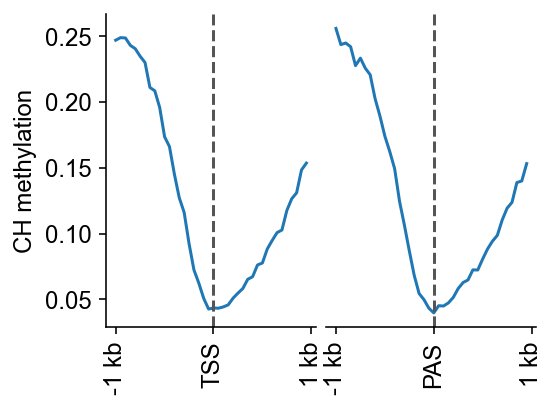

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(4, 3), sharey=True)
ax[0].plot(tss_cov)
ax[1].plot(tts_cov)

metaplot_bs_seq.set_ax(ax, b1, a1, b1, a1, bins, ylabel='CH methylation')

plt.tight_layout()
plt.subplots_adjust(wspace=.05);

## reference-scale

### gene region

In [9]:
infile = '/public1/mowp/workspace/mowp_scripts/pipelines/WGBS_pipeline/bw_files/col0_wgbs.methratio.cg.bw'
bins = 100
b = 2000
a = 2000
m = 2000
cov = metaplot_bs_seq.get_meta_scale_result(infile, gene_region, bins=bins, before=b, after=a, regionbody=m, exclude_chr={'Pt', 'Mt'})

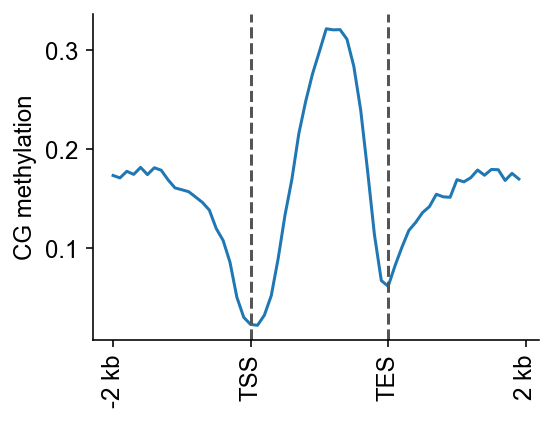

In [10]:
plt.figure(figsize=(4, 3))
plt.plot(cov)

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'TES', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('CG methylation')

sns.despine(top=True, right=True)

### TE region

In [37]:
import pyranges as pr
gff = '/data/Zhaijx/mowp/db/Arabidopsis_thaliana/gff3/Araport11_GFF3_genes_transposons.201606.gff'
gff = pr.read_gff3(gff, as_df=True)

In [11]:
te_region = gff.query('Feature == "transposable_element" and End - Start > 2000')[['Chromosome', 'Start', 'End', 'Strand']]
te_region = te_region.to_numpy()

In [12]:
te_region

array([['1', 499134, 501371, '-'],
       ['1', 639129, 641133, '+'],
       ['1', 2070736, 2073535, '+'],
       ...,
       ['5', 24303057, 24305454, '-'],
       ['5', 24343852, 24345901, '-'],
       ['5', 26482935, 26485402, '-']], dtype=object)

In [13]:
bins = 100
b = 4000
a = 4000
m = 4000

# CG
infile = '/public1/mowp/workspace/mowp_scripts/pipelines/WGBS_pipeline/bw_files/col0_wgbs.methratio.cg.bw'
cg_cov = metaplot_bs_seq.get_meta_scale_result(infile, te_region, bins=bins, before=b, after=a, regionbody=m, exclude_chr={'Pt', 'Mt'})

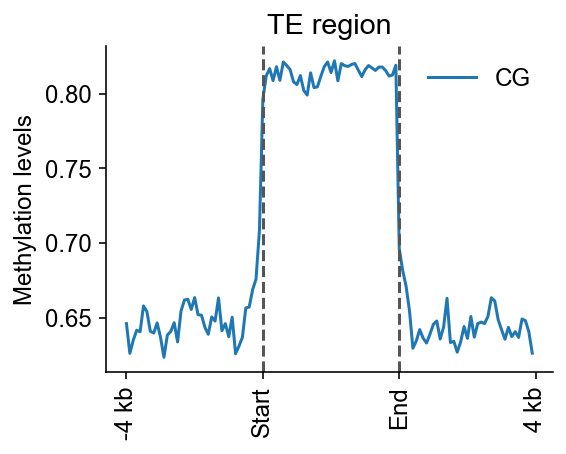

In [14]:
plt.figure(figsize=(4, 3))
plt.plot(cg_cov, label='CG')

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'Start', 'End', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Methylation levels')
plt.legend(frameon=False)
plt.title('TE region')

sns.despine(top=True, right=True)